In [1]:
import json
from pathlib import Path
import pandas as pd
from datetime import datetime 
pd.set_option('max_colwidth',300)

**Mining C data from github repositories**

In [ ]:
!pip install pydriller
from pydriller.repository_mining import RepositoryMining

since_date = datetime(2020, 11, 28)
to_date = datetime(2020, 11, 29)

repositories = ['https://github.com/s-matyukevich/raspberry-pi-os',
                'https://github.com/ggreer/the_silver_searcher',
                'https://github.com/boostorg/graph',
                'https://github.com/boostorg/asio.git',
                'https://github.com/boostorg/python.git']
               # 'https://github.com/vurtun/nuklear',
                #'https://github.com/pbatard/rufus',
                #'https://github.com/hashcat/hashcat',
                #'https://github.com/glfw/glfw']

messages, code, complexity, lines = [], [], [], []
for repository in repositories:
  for commit in RepositoryMining(repository).traverse_commits():
    for modified_file in commit.modifications:
      if modified_file.methods:
        messages.append(commit.msg)
        code.append(modified_file.diff)
        complexity.append(modified_file.complexity)
        lines.append(modified_file.nloc)

c_data = pd.DataFrame(columns = {'Message': [], 'Code': [], 'Lines': [], 'Complexity': []})
c_data['Message'] = messages
c_data['Code'] = code
c_data['Lines'] = lines
c_data['Complexity'] = complexity

c_data['Code'] = c_data['Code'].str.replace(r' +', ' ')
c_data['Code'] = c_data['Code'].str.replace(r'\t', '')
c_data['Message'] = c_data['Message'].str.replace(r' +', ' ')
 
c_data = c_data[c_data['Message'] != 'Initial commit']
c_data = c_data[c_data['Message'] != 'refactoring']
c_data = c_data[c_data['Message'] != 'Merge pull request']
c_data = c_data[c_data['Message'].str.len() > 20]
c_data = c_data[c_data['Message'].str.len() > 40]
c_data = c_data[c_data['Code'] != ' ']

c_data.drop_duplicates(inplace=True, subset=['Message'])
c_data.dropna(subset=['Code'], inplace=True)
print(c_data.shape)

(4194, 4)


In [ ]:
c_data.head()

,Message,Code,Lines,Complexity
60,lesson1 refactored. First version of lesson1 doc created,"@@ -5,6 +5,7 @@ void kernel_main(void)\n uart_init();\n uart_send_string(""Hello, world!\r\n"");\n \n-while (1)\n+while (1) {\n uart_send(uart_recv());\n+}\n }\n",9,2
163,complete 1.2 and 1.4\n\nThey are the same files. I mingled them. But the qemu only works with single core.,"@@ -0,0 +1,14 @@\n+#include ""uart.h""\n+\n+void kernel_main(unsigned long id) {\n+ if(id == 0) {\n+ uart_init();\n+ }\n+ uart_send_string(""Hello from processor "");\n+ uart_send(id + 48);\n+ uart_send_string("".\r\n"");\n+\n+ while (1) {\n+ uart_send(uart_recv());\n+ }\n+}\n",12,3
184,exercises/rs: Update lesson01/4 to use qemu support for mini UART,"@@ -1,4 +1,4 @@\n-#include ""uart.h""\n+#include ""mini_uart.h""\n \n void kernel_main(void) {\n uart_init();\n",8,2
197,"exercises/rs: add lesson 03 responses\n\nQEMU port does not work yet, I still need to figure out why. I will post\na patch later.","@@ -0,0 +1,48 @@\n+#include ""peripherals/irq.h""\n+#include ""entry.h""\n+#include ""printf.h""\n+#include ""timer.h""\n+#include ""utils.h""\n+\n+const char *entry_error_messages[] = {\n+ ""SYNC_INVALID_EL1t"", ""IRQ_INVALID_EL1t"",\n+ ""FIQ_INVALID_EL1t"", ""ERROR_INVALID_EL1T"",\n+\n+ ""SYNC_INVALID_EL1h"", ""IR...",32,4
215,"exercises/rs: add lesson 4 responses for 1, 2 and 4","@@ -0,0 +1,27 @@\n+#include ""entry.h""\n+#include ""mm.h""\n+#include ""printf.h""\n+#include ""sched.h""\n+\n+int copy_process(unsigned long fn, unsigned long arg) {\n+ preempt_disable();\n+ struct task_struct *p;\n+\n+ p = (struct task_struct *)get_free_page();\n+ if (!p)\n+ return 1;\n+ p->priority ...",24,2


In [ ]:
c_data.to_csv('pydriller_5k.csv')

In [ ]:
!pip install pydriller
from pydriller.repository_mining import RepositoryMining

repositories = ['https://github.com/boostorg/math',
                'https://github.com/boostorg/log',
                'https://github.com/antirez/rax',
                'https://github.com/Pithikos/C-Thread-Pool',
                'https://github.com/google/flatbuffers',
                'https://github.com/oracle/python-cx_Oracle',
                'https://github.com/oracle/odpi',
                'https://github.com/oracle/dtrace-utils']

messages, code, complexity, lines = [], [], [], []
for repository in repositories:
  for commit in RepositoryMining(repository).traverse_commits():
    for modified_file in commit.modifications:
      if modified_file.methods:
        messages.append(commit.msg)
        code.append(modified_file.diff)
        complexity.append(modified_file.complexity)
        lines.append(modified_file.nloc)

c_data = pd.DataFrame(columns = {'Message': [], 'Code': [], 'Lines': [], 'Complexity': []})
c_data['Message'] = messages
c_data['Code'] = code
c_data['Lines'] = lines
c_data['Complexity'] = complexity

c_data['Code'] = c_data['Code'].str.replace(r' +', ' ')
c_data['Code'] = c_data['Code'].str.replace(r'\t', '')
c_data['Code'] = c_data['Code'].str.replace(r'\@@.*?@@', '')
c_data['Message'] = c_data['Message'].str.replace(r' +', ' ')
 
c_data = c_data[c_data['Message'] != 'Initial commit']
c_data = c_data[c_data['Message'] != 'refactoring']
c_data = c_data[c_data['Message'] != 'Merge pull request']
c_data = c_data[c_data['Message'].str.len() > 20]
c_data = c_data[c_data['Message'].str.len() > 40]
c_data = c_data[c_data['Code'] != ' ']

c_data.drop_duplicates(inplace=True, subset=['Message'])
c_data.dropna(subset=['Code'], inplace=True)
print(c_data.shape)

(6197, 4)


In [ ]:
c_data.head()

,Message,Code,Lines,Complexity
0,"Special functions, octonions, quaternions by Hubert Holin\n\n\n[SVN r10404]","\n+// boost octonion.hpp header file\n+\n+// (C) Copyright Hubert Holin 2001. Permission to copy, use, modify, sell and\n+// distribute this software is granted provided this copyright notice appears\n+// in all copies. This software is provided ""as is"" without express or implied\n+// warranty, ...",2089,386
5,"Special functions, octonions, quaternions by Hubert Holin\n\n\n[SVN r10405]","\n+// test file for octonion.hpp\n+\n+// (C) Copyright Hubert Holin 2001. Permission to copy, use, modify, sell and\n+// distribute this software is granted provided this copyright notice appears\n+// in all copies. This software is provided ""as is"" without express or implied\n+// warranty, and ...",439,31
11,fix various compile problems\n\n\n[SVN r10484],"int test_main(int, char *[])\n numeric_limits<float>::epsilon());\n \n BOOST_CRITICAL_TEST(abs(\n- exp(::boost::quaternion<float>(0,4*::std::atan(1),0,0))+\n+ exp(::boost::quaternion<float>(0,4*::std::atan(1.0),0,0))+\n static_cast<float>(1)) <=\n numeric_limits<float>::epsilon());\n \n BOOST_C...",538,5
12,moved to namespace boost::math\nformatting changes\n\n\n[SVN r10568],"\n-// boost octonion.hpp header file\n+// boost octonion.hpp header file\n \n // (C) Copyright Hubert Holin 2001. Permission to copy, use, modify, sell and\n // distribute this software is granted provided this copyright notice appears\n\n \n namespace boost\n {\n-#define BOOST_OCTONION_ACCESSOR...",2092,386
17,moved to namespace boost::math\nformatting changed\n\n\n[SVN r10569],\n \n // explicit (if ludicrous) instanciation\n #ifndef __GNUC__\n-template class ::boost::octonion<int>;\n+template class ::boost::math::octonion<int>;\n #else\n // gcc 3.0 doesn't like the absolutely-qualified namespace\n-template class boost::octonion<int>;\n+template class boost::math::octo...,367,13


In [ ]:
c_data.to_csv('pydriller_6k_filtered.csv')

In [5]:
!pip install pydriller
from pydriller.repository_mining import RepositoryMining

repositories = ['https://github.com/FreyrSCADA/DNP3',
                'https://github.com/google/googletest',
                'https://github.com/google/oss-fuzz',
                'https://github.com/kernelslacker/trinity',
                'https://github.com/Pithikos/C-Thread-Pool',
                'https://github.com/google/flatbuffers',
                'https://github.com/oracle/python-cx_Oracle',
                'https://github.com/oracle/odpi',
                'https://github.com/oracle/dtrace-utils']

messages, code, complexity, lines = [], [], [], []
for repository in repositories:
  for commit in RepositoryMining(repository).traverse_commits():
    for modified_file in commit.modifications:
      if modified_file.methods:
        messages.append(commit.msg)
        code.append(modified_file.diff)
        complexity.append(modified_file.complexity)
        lines.append(modified_file.nloc)

c_data = pd.DataFrame(columns = {'Message': [], 'Code': [], 'Lines': [], 'Complexity': []})
c_data['Message'] = messages
c_data['Code'] = code
c_data['Lines'] = lines
c_data['Complexity'] = complexity

c_data['Code'] = c_data['Code'].str.replace(r' +', ' ')
c_data['Code'] = c_data['Code'].str.replace(r'\t', '')
c_data['Code'] = c_data['Code'].str.replace(r'\@@.*?@@', '')
c_data['Message'] = c_data['Message'].str.replace(r' +', ' ')
 
c_data = c_data[c_data['Message'] != 'Initial commit']
c_data = c_data[c_data['Message'] != 'refactoring']
c_data = c_data[c_data['Message'] != 'Merge pull request']
c_data = c_data[c_data['Message'].str.len() > 20]
c_data = c_data[c_data['Message'].str.len() < 700]
c_data = c_data[c_data['Code'].str.len() < 1000]
c_data = c_data[c_data['Code'] != ' ']

c_data.drop_duplicates(inplace=True, subset=['Message'])
c_data.dropna(subset=['Code'], inplace=True)
print(c_data.shape)

(6789, 4)


In [7]:
c_data.head()

,Message,Code,Lines,Complexity
64,Makes the autotools scripts work on Mac OS X. Also hopefully makes gtest compile on Windows CE.,"\n #ifndef GTEST_INCLUDE_GTEST_GTEST_MESSAGE_H_\n #define GTEST_INCLUDE_GTEST_GTEST_MESSAGE_H_\n \n-#if defined(__APPLE__) && !defined(GTEST_NOT_MAC_FRAMEWORK_MODE)\n-// When using Google Test on the Mac as a framework, all the includes will be\n-// in the framework headers folder along with gte...",72,18
73,"Makes Google Test compile on Mac OS X and Cygwin, and adds project files for Microsoft Visual Studio.","\n // Test flag names share, in upper case.\n //\n // Macros indicating the current platform:\n+// GTEST_OS_CYGWIN - defined iff compiled on Cygwin.\n // GTEST_OS_LINUX - defined iff compiled on Linux.\n // GTEST_OS_MAC - defined iff compiled on Mac OS X.\n // GTEST_OS_WINDOWS - defined iff comp...",148,29
76,Fixes some style nits; also fixes minor bugs in gtest-death-test.cc.,"String FormatForFailureMessage(wchar_t wchar);\n // This internal macro is used to avoid duplicated code.\n #define GTEST_FORMAT_IMPL(operand2_type, operand1_printer)\\n inline String FormatForComparisonFailureMessage(\\n- operand2_type::value_type* str, const operand2_type& operand2) {\\n+ ope...",141,23
79,Makes the output understandable by VS when compiled by MSVC.,"static const char * TestPartResultTypeToString(TestPartResultType type) {\n \n case TPRT_NONFATAL_FAILURE:\n case TPRT_FATAL_FAILURE:\n- return ""Failure"";\n+#ifdef _MSC_VER\n+ return ""error: "";\n+#else\n+ return ""Failure\n"";\n+#endif\n }\n \n return ""Unknown result type"";\n static void PrintTes...",2031,471
85,Adds a test for the GTEST_PRINT_TIME env var. By Balazs.Dan@gmail.com.,"def TestEnvVarAffectsFlag(command):\n TestFlag(command, 'color', 'yes', 'auto')\n TestFlag(command, 'filter', 'FooTest.Bar', '*')\n TestFlag(command, 'output', 'tmp/foo.xml', '')\n+ TestFlag(command, 'print_time', '1', '0')\n TestFlag(command, 'repeat', '999', '1')\n \n if IS_WINDOWS:\n",71,14


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69e32550b8>,
      dtype=object)

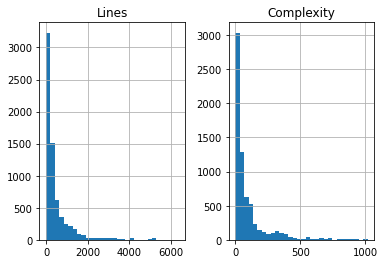

In [8]:
c_data.hist(bins=30)

In [9]:
c_data.to_csv('pydriller_6k_filtered.csv', index=False)

In [14]:
!pip install pydriller
from pydriller.repository_mining import RepositoryMining

repositories = ['https://github.com/tensorflow/tensorflow.git']

messages, code, complexity, lines = [], [], [], []
for repository in repositories:
  for commit in RepositoryMining(repository).traverse_commits():
    for modified_file in commit.modifications:
      if modified_file.methods:
        messages.append(commit.msg)
        code.append(modified_file.diff)
        complexity.append(modified_file.complexity)
        lines.append(modified_file.nloc)

c_data = pd.DataFrame(columns = {'Message': [], 'Code': [], 'Lines': [], 'Complexity': []})
c_data['Message'] = messages
c_data['Code'] = code
c_data['Lines'] = lines
c_data['Complexity'] = complexity

c_data['Code'] = c_data['Code'].str.replace(r' +', ' ')
c_data['Code'] = c_data['Code'].str.replace(r'\t', '')
c_data['Code'] = c_data['Code'].str.replace(r'\@@.*?@@', '')
c_data['Message'] = c_data['Message'].str.replace(r' +', ' ')
 
c_data = c_data[c_data['Message'] != 'Initial commit']
c_data = c_data[c_data['Message'] != 'refactoring']
c_data = c_data[c_data['Message'] != 'Merge pull request']
c_data = c_data[c_data['Message'].str.len() > 20]
c_data = c_data[c_data['Message'].str.len() < 700]
c_data = c_data[c_data['Code'].str.len() < 1000]
c_data = c_data[c_data['Code'] != ' ']

c_data.drop_duplicates(inplace=True, subset=['Message'])
c_data.dropna(subset=['Code'], inplace=True)
print(c_data.shape)

(43102, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69deb34128>,
      dtype=object)

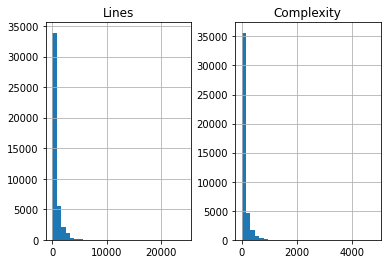

In [16]:
c_data.hist(bins=30)

In [15]:
c_data.head()

,Message,Code,Lines,Complexity
0,TensorFlow: Initial commit of TensorFlow library.\nTensorFlow is an open source software library for numerical computation\nusing data flow graphs.\n\nBase CL: 107276108,"\n+#include ""tensorflow/core/framework/function.h""\n+#include ""tensorflow/core/lib/core/errors.h""\n+\n+namespace tensorflow {\n+\n+typedef FunctionDefHelper FDH;\n+\n+REGISTER_OP_NO_GRADIENT(""Shape"");\n+REGISTER_OP_NO_GRADIENT(""Rank"");\n+REGISTER_OP_NO_GRADIENT(""Size"");\n+\n+Status ReshapeGrad(c...",21,1
1219,TensorFlow: Upstream latest changes to Git.\n\nChanges:\n- Updates to installation instructions.\n- Updates to documentation.\n- Minor modifications and tests for word2vec.\n\nBase CL: 107284192,"struct SoftmaxEigenImpl {\n Eigen::IndexList<Eigen::type2index<1>, int> one_by_class;\n one_by_class.set(1, num_classes);\n #endif\n- // NOTE(mdevin): If you modify this implementation please run\n+ // NOTE(touts): If you modify this implementation please run\n // the ImageNetSoftmaxFwd benchma...",40,2
1266,"TensorFlow: Upstream changes to git.\n\nChanges:\n\n- Update a lot of documentation, installation instructions,\n requirements, etc.\n\n- Add RNN models directory for recurrent neural network\n examples to go along with the tutorials.\n\nBase CL: 107290480","class Library(Document):\n # signatures.\n continue\n args_list.append(arg)\n+\n+ # TODO(mrry): This is a workaround for documenting signature of\n+ # functions that have the @contextlib.contextmanager decorator.\n+ # We should do something better.\n+ if argspec.varargs == ""args"" and argspec.ke...",318,113
1270,"TensorFlow: Upstream latest commits to git.\n\nChanges:\n- Updates to Documentation, README.md, installation\n instructions, anchor links, etc.\n\n- Adds Readme for embedding directory.\n\nBase CL: 107308461","The key ops used are:\n * skipgram custom op that does input processing.\n """"""\n \n+import os\n import sys\n import threading\n import time\n class Word2Vec(object):\n def save_vocab(self):\n """"""Save the vocabulary to a file so the model can be reloaded.""""""\n opts = self._options\n- with open(o...",336,50
1274,"TensorFlow: Upstream latest changes to git.\n\nChanges:\n- Documentation changes: adding some examples\n for adding_an_op, fixes to some of the markdown,\n updates to docstrings, etc.\n\n- Remove Dockerfile for now -- still undergoing\n changes.\n\nBase CL: 107341050","namespace tensorflow {\n ///\n /// Example:\n ///\n+/// ```c++\n+///\n /// tensorflow::GraphDef graph;\n-/// // ... Create or load graph into 'graph'.\n+/// // ... Create or load graph into ""graph"".\n ///\n /// // This example uses the default options which connects\n /// // to a local runtime....",23,1


In [17]:
c_data.to_csv('pydriller_40k_tensorflow.csv', index=False)